# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a [Meetup](https://www.meetup.com/) dataset for events occurring in Nashville.

## Objectives

You will be able to: 

- Make visualizations of clusters and gain insights about how the clusters have formed 
- Cluster a real-life social network dataset to detect communities within the network  


## Load the Dataset

To get started, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Your code here
groups = pd.read_csv("nashville-meetup/group-edges.csv")
groups.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [3]:
# Your code here
groups_meta = pd.read_csv("nashville-meetup/meta-groups.csv")
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [4]:
# Your code here
G = nx.Graph()

group_name = dict(zip(groups_meta["group_id"], groups_meta["group_name"]))

for i in groups.index:
    g1 = group_name[groups["group1"][i]]
    g2 = group_name[groups["group2"][i]]
    weight = groups["weight"][i]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

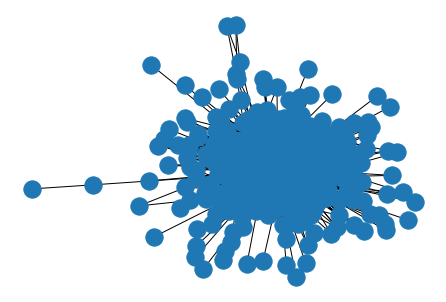

In [5]:
# Your code here
nx.draw(G)

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

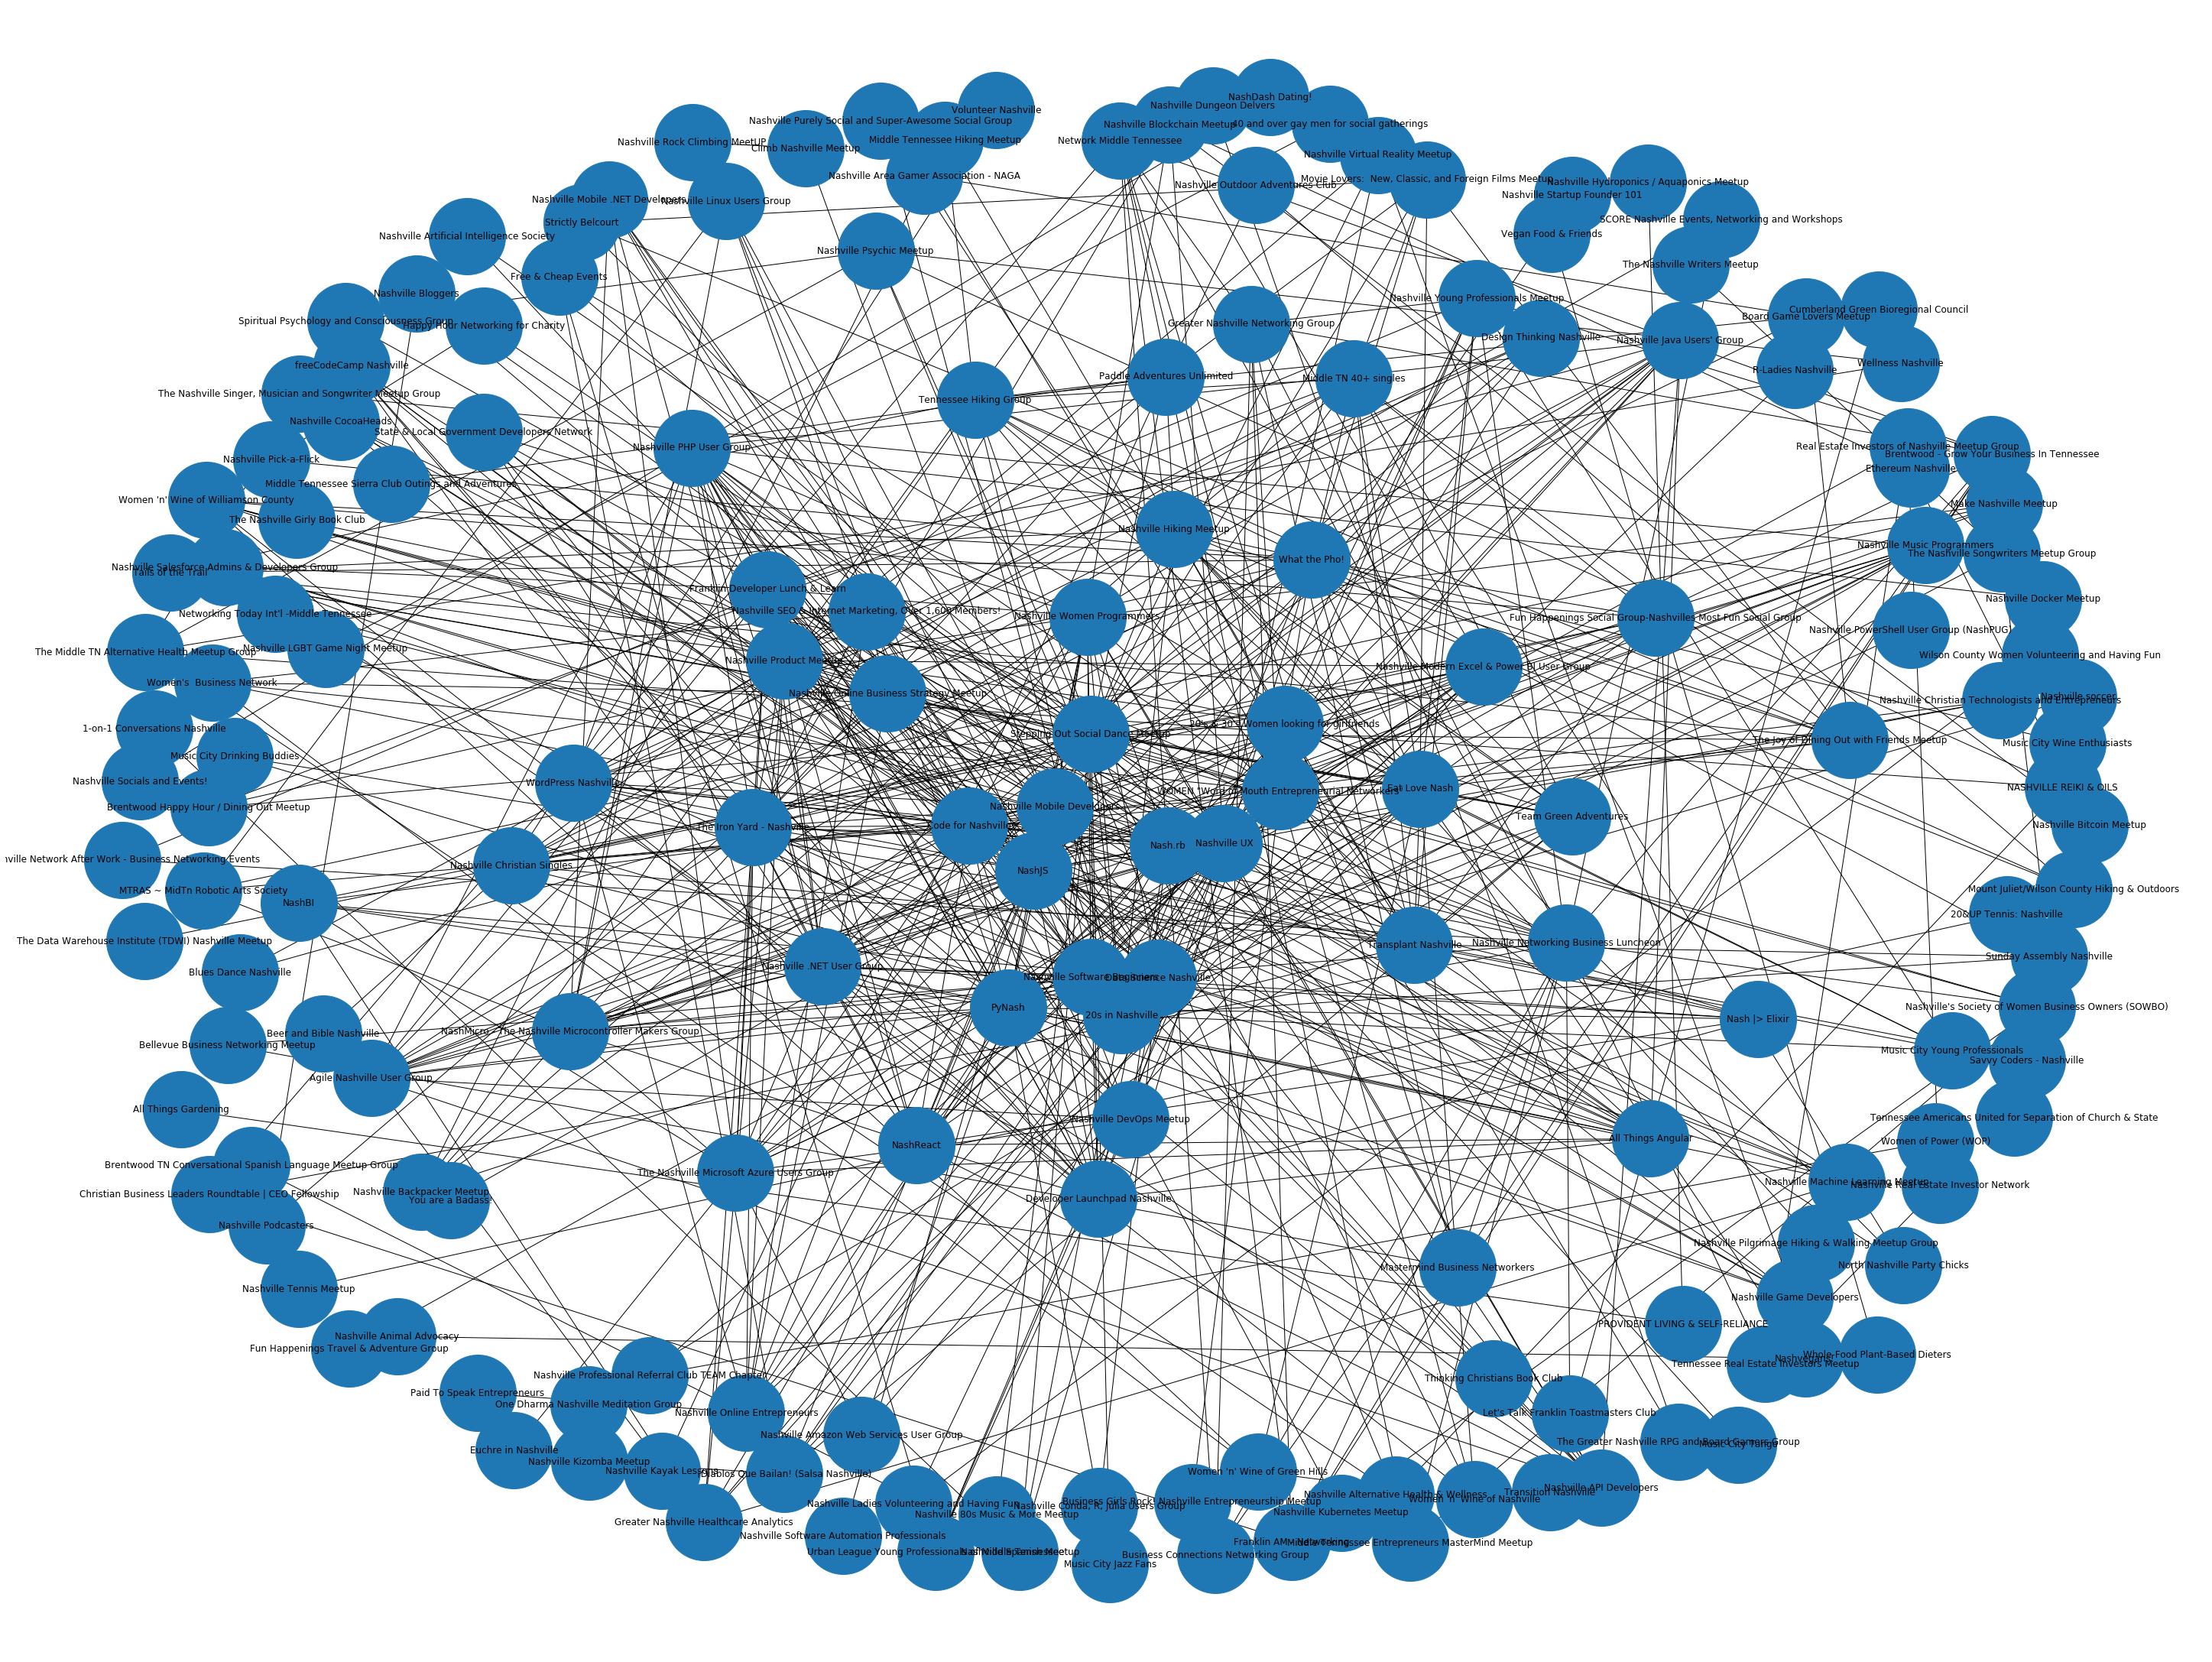

In [6]:
# Your code here
G2 = nx.Graph()

for i in groups.index:
    g1 = group_name[groups["group1"][i]]
    g2 = group_name[groups["group2"][i]]
    weight = groups["weight"][i]
    
    if weight > 4:
        G2.add_edge(g1, g2, weight=weight)

plt.figure(figsize=(40,30))
nx.draw(G2, pos=nx.spring_layout(G2, k=3), node_size=10000, with_labels=True)

## Cluster the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [7]:
# Your code here
cgn = list(nx.algorithms.community.centrality.girvan_newman(G2))
len(cgn)

168

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

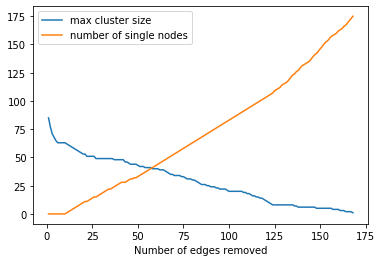

In [8]:
# Your code here
x = [i+1 for i in range(len(cgn))]

max_cluster = [max([len(cluster) for cluster in c]) for c in cgn]
plt.plot(x, max_cluster, label="max cluster size")

single = [sum([1 if len(s)==1 else 0 for s in c]) for c in cgn]
plt.plot(x, single, label="number of single nodes")

plt.xlabel("Number of edges removed")
plt.legend();

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

In [9]:
def plot_girvan_newman(G, clusters):
    # Your code here 
    colors = list(matplotlib.colors.cnames.values())
    
    fig = plt.figure(figsize=(30,20))
    for i, c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, with_labels=True, node_color=colors[i],
                alpha=.7, font_weight='bold', pos=nx.spring_layout(G, k=2, seed=4), node_size=10000)
        
    plt.show();

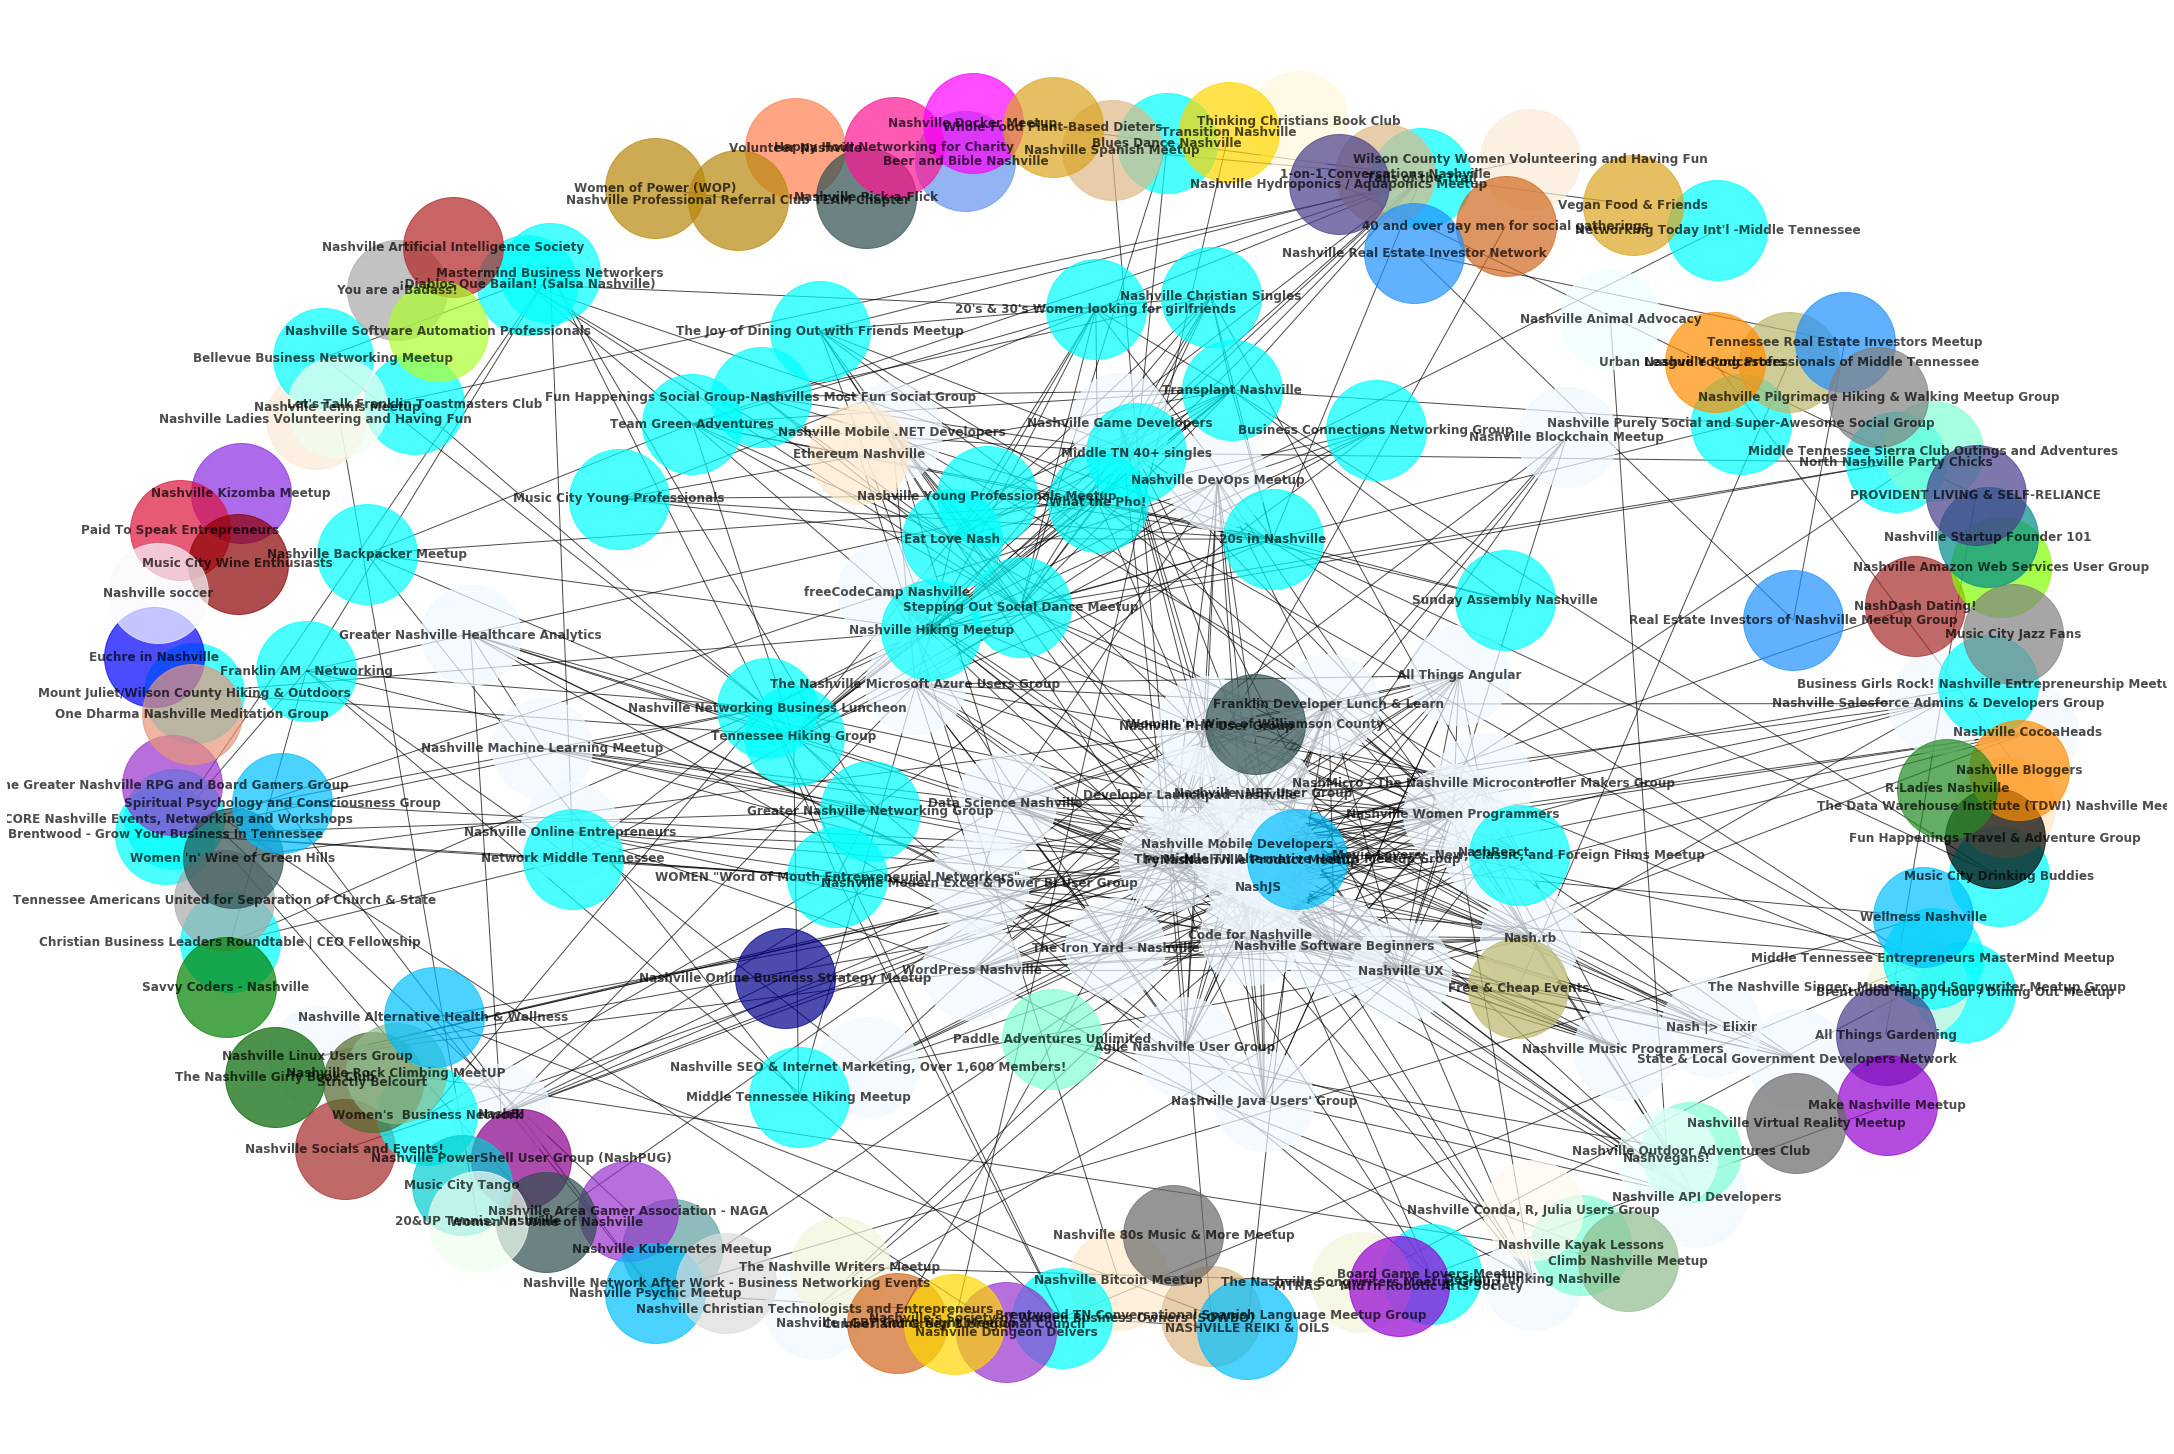

In [10]:
# Your code here
plot_girvan_newman(G2, cgn[50])

In [11]:
pd.DataFrame(cgn[50]).transpose()

0   \
0                         Nashville Women Programmers   
1                              freeCodeCamp Nashville   
2                                              PyNash   
3                                 WordPress Nashville   
4                                             Nash.rb   
5         State & Local Government Developers Network   
6                       Developer Launchpad Nashville   
7   Nashville SEO & Internet Marketing, Over 1,600...   
8   NashMicro - The Nashville Microcontroller Make...   
9                    Franklin Developer Lunch & Learn   
10  Nashville Christian Technologists and Entrepre...   
11                           Nashville PHP User Group   
12                     Nashville Online Entrepreneurs   
13                                          NashReact   
14                           Nashville Product Meetup   
15                                     Nash |> Elixir   
16                                 All Things Angular   
17                        Nashville Blockchain Meetup   
18                         Agile Nashville User Group   
19                             Data Science Nashville   
20                                             NashBI   
21                        Nashville Java Users' Group   
22                            Nashville DevOps Meetup   
23                               Nashville CocoaHeads   
24                        Nashville Music Programmers   
25                           Nashville API Developers   
26       Nashville Modern Excel & Power BI User Group   
27     Nashville Salesforce Admins & Developers Group   
28                          Nashville Game Developers   
29                                 Code for Nashville   
30             Greater Nashville Healthcare Analytics   
31          The Nashville Microsoft Azure Users Group   
32                  Nashville Machine Learning Meetup   
33                                       Nashville UX   
34                          Design Thinking Nashville   
35                          The Iron Yard - Nashville   
36                                             NashJS   
37                       Nashville Software Beginners   
38                          Nashville .NET User Group   
39                        Nashville Linux Users Group   
40                   Nashville Mobile .NET Developers   
41                        Nashville Mobile Developers   

                                                 1   \
0      Nashville Ladies Volunteering and Having Fun   
1   Wilson County Women Volunteering and Having Fun   
2                                              None   
3                                              None   
4                                              None   
5                                              None   
6                                              None   
7                                              None   
8                                              None   
9                                              None   
10                                             None   
11                                             None   
12                                             None   
13                                             None   
14                                             None   
15                                             None   
16                                             None   
17                                             None   
18                                             None   
19                                             None   
20                                             None   
21                                             None   
22                                             None   
23                                             None   
24                                             None   
25                                             None   
26                                             None   
27                                             None   
28  

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               